# "backtesting crypto"
> "How to fetch and backtest crypto data using fastquant"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Jerome de Leon
- categories: [crypto, backtest, grid search]

In [1]:
# uncomment to install in colab
# !pip3 install fastquant

## fetch data from binance

In [2]:
from fastquant import get_crypto_data

crypto = get_crypto_data("BTC/USDT", 
                         "2018-12-01", 
                         "2019-12-31",
                         time_resolution='1d'
                        )

In [3]:
crypto

,open,high,low,close,volume
dt,,,,,
2018-12-01,4041.27,4299.99,3963.01,4190.02,44840.073481
2018-12-02,4190.98,4312.99,4103.04,4161.01,38912.154790
2018-12-03,4160.55,4179.00,3827.00,3884.01,49094.369163
2018-12-04,3884.76,4085.00,3781.00,3951.64,48489.551613
2018-12-05,3950.98,3970.00,3745.00,3769.84,44004.799448
...,...,...,...,...,...
2019-12-27,7202.00,7275.86,7076.42,7254.74,33642.701861
2019-12-28,7254.77,7365.01,7238.67,7316.14,26848.982199
2019-12-29,7315.36,7528.45,7288.00,7388.24,31387.106085


## run backtest with a grid of values

In [4]:
from fastquant import backtest

results = backtest('smac', 
                   crypto, 
                   fast_period=[7,14,21,28], 
                   slow_period=[30,45,60,75],
                   plot=False,
                   verbose=False
                  )

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 30
Final Portfolio Value: 167957.05730000004
Final PnL: 67957.06
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 45
Final Portfolio Value: 200109.894525
Final PnL: 100109.89
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 60
Final Portfolio Value: 189298.80590000006
Final PnL: 89298.81
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 75
Final Portfolio Value: 258316.23405000006
Final PnL: 158316.23
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level argume

In [5]:
results.head()

,init_cash,buy_prop,sell_prop,commission,execution_type,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,sharperatio,pnl,final_value
0,100000,1,1,0.0075,close,7,75,0.949014,0.002397,0.829272,82.927229,0.987367,158316.23,258316.234050
1,100000,1,1,0.0075,close,28,60,0.931504,0.002352,0.809002,80.900205,0.986999,153832.42,253832.420400
2,100000,1,1,0.0075,close,14,75,0.830975,0.002098,0.696898,69.689847,0.984563,129555.54,229555.539175
3,100000,1,1,0.0075,close,21,75,0.782243,0.001975,0.645083,64.508323,0.983142,118637.07,218637.072700
4,100000,1,1,0.0075,close,28,75,0.769574,0.001943,0.631874,63.187426,0.982741,115884.74,215884.739100


That's a 258% maximum profit using only SMAC because bitcoin was bullish all time long!

In [6]:
#get best parameters on top row 
fast_best, slow_best = results.iloc[0][["fast_period","slow_period"]]
fast_best, slow_best

(7, 75)

## run backtest using optimum values

In [7]:
import matplotlib as pl
pl.style.use("default")
pl.rcParams["figure.figsize"] = (9,5)

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 75
Final Portfolio Value: 258316.23405000006
Final PnL: 158316.23
Time used (seconds): 0.10320520401000977
Optimal parameters: {'init_cash': 100000, 'buy_prop': 1, 'sell_prop': 1, 'commission': 0.0075, 'execution_type': 'close', 'fast_period': 7, 'slow_period': 75}
Optimal metrics: {'rtot': 0.9490143617322465, 'ravg': 0.002396500913465269, 'rnorm': 0.8292722866407841, 'rnorm100': 82.92722866407841, 'sharperatio': 0.9873670567519415, 'pnl': 158316.23, 'final_value': 258316.23405000006}


<IPython.core.display.Javascript object>


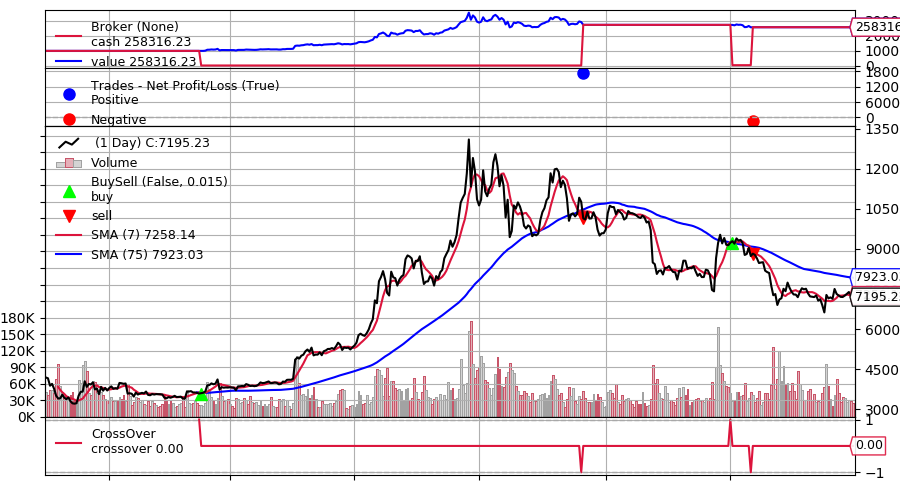

In [8]:
results = backtest('smac', 
                   crypto, 
                   fast_period=fast_best, 
                   slow_period=slow_best,
                   plot=True,
                   verbose=False
                  )

## accessing transactions history

This is done by setting `return_transactions`=True

### single strategy

In [9]:
results, transactions = backtest('smac', 
                               crypto, 
                               fast_period=fast_best, 
                               slow_period=slow_best,
                               plot=False,
                               verbose=False,
                               return_transactions=True
                              )

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 75
2019-02-14, BUY CREATE, 3590.56
2019-02-14, Cash: 100000.0
2019-02-14, Price: 3590.56
2019-02-14, Buy prop size: 27
2019-02-14, Afforded size: 27
2019-02-14, Final size: 27
2019-02-15, BUY EXECUTED, Price: 3590.56, Cost: 96945.12, Comm: 727.09
2019-08-20, SELL CREATE, 10142.57
2019-08-21, SELL EXECUTED, Price: 10142.57, Cost: 96945.12, Comm: 2053.87
2019-08-21, OPERATION PROFIT, GROSS 176904.27, NET 174123.31
2019-11-01, BUY CREATE, 9231.61
2019-11-01, Cash: 274123.31117500004
2019-11-01, Price: 9231.61
2019-11-01, Buy prop size: 29
2019-11-01, Afforded size: 29
2019-11-01, Final size: 29
2019-11-02, BUY EXECUTED, Price: 9231.61, Cost: 267716.69, Comm: 2007.88
2019-11-11, SELL CREATE, 8821.94
2019-11-12, SELL EXECUTED, Price: 8821.94, Cost: 267716.69, Comm: 1918.77
2019-11-12, OPERATION PROFIT, GROSS -11880.43, NET -15807.08
Fina

In [10]:
transactions.keys()

dict_keys(['smac'])

In [11]:
transactions

{'smac':            buy_price sell_price       cost commision
 dt                                                  
 2019-02-15   3590.56       None   96945.12    727.09
 2019-08-21      None   10142.57   96945.12   2053.87
 2019-11-02   9231.61       None  267716.69   2007.88
 2019-11-12      None    8821.94  267716.69   1918.77}

### multi strategy

In [12]:
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': [7,14,21], 
           'slow_period': [30,45,60]
            },
        'rsi': {
            'rsi_upper': [70,80],
            'rsi_lower': [20,30] 
        }
   }
results, transactions = backtest('multi', 
                                   crypto, 
                                   strats=strats,
                                   plot=False,
                                   verbose=False,
                                   return_transactions=True
                                  )

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 30
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 20
2018-12-15, BUY CREATE, 3211.72
2018-12-15, Cash: 100000.0
2018-12-15, Price: 3211.72
2018-12-15, Buy prop size: 30
2018-12-15, Afforded size: 30
2018-12-15, Final size: 30
2018-12-16, BUY EXECUTED, Price: 3211.72, Cost: 96351.60, Comm: 722.64
2019-01-13, SELL CREATE, 3626.09
2019-01-14, SELL EXECUTED, Price: 3626.09, Cost: 96351.60, Comm: 815.87
2019-02-11, BUY CREATE, 3631.05
2019-02-11, Cash: 110892.59275000001
2019-02-11, Price: 3631.05
2019-02-11, Buy prop size: 30
2019-02-11, Afforded size: 30
2019-02-11, Final size: 30
2019-02-12, BUY EXECUTED, Price: 3631.05, Cost: 108931.50, Comm: 816.99
2019-02-12, OPERATION PROFIT, GROSS -148.80, NET -1781.66
2019-02

2019-06-15, BUY CREATE, 8808.70
2019-06-15, Cash: 148012.27150000003
2019-06-15, Price: 8808.7
2019-06-15, Buy prop size: 16
2019-06-15, Afforded size: 16
2019-06-15, Final size: 16
2019-06-16, BUY EXECUTED, Price: 8808.70, Cost: 140939.20, Comm: 1057.04
2019-06-24, SELL CREATE, 11820.86
2019-06-25, SELL EXECUTED, Price: 11820.86, Cost: 140939.20, Comm: 1418.50
2019-08-05, BUY CREATE, 11828.80
2019-08-05, Cash: 193731.28430000003
2019-08-05, Price: 11828.8
2019-08-05, Buy prop size: 16
2019-08-05, Afforded size: 16
2019-08-05, Final size: 16
2019-08-06, BUY EXECUTED, Price: 11828.80, Cost: 189260.80, Comm: 1419.46
2019-08-18, SELL CREATE, 10915.54
2019-08-19, SELL EXECUTED, Price: 10915.54, Cost: 189260.80, Comm: 1309.86
2019-09-08, BUY CREATE, 10381.18
2019-09-08, Cash: 176389.80350000004
2019-09-08, Price: 10381.18
2019-09-08, Buy prop size: 16
2019-09-08, Afforded size: 16
2019-09-08, Final size: 16
2019-09-09, BUY EXECUTED, Price: 10381.18, Cost: 166098.88, Comm: 1245.74
2019-09-22

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 7
slow_period : 45
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
rsi_period : 14
rsi_upper : 80
rsi_lower : 30
2018-12-15, BUY CREATE, 3211.72
2018-12-15, Cash: 100000.0
2018-12-15, Price: 3211.72
2018-12-15, Buy prop size: 30
2018-12-15, Afforded size: 30
2018-12-15, Final size: 30
2018-12-16, BUY EXECUTED, Price: 3211.72, Cost: 96351.60, Comm: 722.64
2019-04-02, SELL CREATE, 4932.60
2019-04-03, SELL EXECUTED, Price: 4932.60, Cost: 96351.60, Comm: 1109.84
2019-04-03, OPERATION PROFIT, GROSS 51626.40, NET 49793.93
2019-08-07, BUY CREATE, 11975.03
2019-08-07, Cash: 149793.928
2019-08-07, Price: 11975.03
2019-08-07, Buy prop size: 12
2019-08-07, Afforded size: 12
2019-08-07, Final size: 12
2019-08-08, BUY EXECUTED, Price: 11975.03, Cost: 143700.36, Comm: 1077.75
2019-08-1

2018-12-15, BUY CREATE, 3211.72
2018-12-15, Cash: 100000.0
2018-12-15, Price: 3211.72
2018-12-15, Buy prop size: 30
2018-12-15, Afforded size: 30
2018-12-15, Final size: 30
2018-12-16, BUY EXECUTED, Price: 3211.72, Cost: 96351.60, Comm: 722.64
2019-04-02, SELL CREATE, 4932.60
2019-04-03, SELL EXECUTED, Price: 4932.60, Cost: 96351.60, Comm: 1109.84
2019-04-03, OPERATION PROFIT, GROSS 51626.40, NET 49793.93
2019-08-04, BUY CREATE, 10929.23
2019-08-04, Cash: 149793.928
2019-08-04, Price: 10929.23
2019-08-04, Buy prop size: 13
2019-08-04, Afforded size: 13
2019-08-04, Final size: 13
2019-08-05, BUY EXECUTED, Price: 10929.23, Cost: 142079.99, Comm: 1065.60
2019-08-17, SELL CREATE, 10306.78
2019-08-18, SELL EXECUTED, Price: 10306.78, Cost: 142079.99, Comm: 1004.91
2019-08-18, OPERATION PROFIT, GROSS -8091.85, NET -10162.36
2019-09-08, BUY CREATE, 10381.18
2019-09-08, Cash: 139631.56702500005
2019-09-08, Price: 10381.18
2019-09-08, Buy prop size: 13
2019-09-08, Afforded size: 13
2019-09-08, F

2019-06-18, BUY CREATE, 9081.55
2019-06-18, Cash: 148216.288
2019-06-18, Price: 9081.55
2019-06-18, Buy prop size: 16
2019-06-18, Afforded size: 16
2019-06-18, Final size: 16
2019-06-19, BUY EXECUTED, Price: 9081.55, Cost: 145304.80, Comm: 1089.79
2019-06-24, SELL CREATE, 11820.86
2019-06-25, SELL EXECUTED, Price: 11820.86, Cost: 145304.80, Comm: 1418.50
2019-08-08, BUY CREATE, 11999.77
2019-08-08, Cash: 189536.95880000002
2019-08-08, Price: 11999.77
2019-08-08, Buy prop size: 15
2019-08-08, Afforded size: 15
2019-08-08, Final size: 15
2019-08-09, BUY EXECUTED, Price: 11999.77, Cost: 179996.55, Comm: 1349.97
2019-08-24, SELL CREATE, 10142.69
2019-08-25, SELL EXECUTED, Price: 10142.69, Cost: 179996.55, Comm: 1141.05
2019-09-13, BUY CREATE, 10342.06
2019-09-13, Cash: 159189.73205000002
2019-09-13, Price: 10342.06
2019-09-13, Buy prop size: 15
2019-09-13, Afforded size: 15
2019-09-13, Final size: 15
2019-09-14, BUY EXECUTED, Price: 10342.06, Cost: 155130.90, Comm: 1163.48
2019-09-24, SELL

2018-12-15, BUY CREATE, 3211.72
2018-12-15, Cash: 100000.0
2018-12-15, Price: 3211.72
2018-12-15, Buy prop size: 30
2018-12-15, Afforded size: 30
2018-12-15, Final size: 30
2018-12-16, BUY EXECUTED, Price: 3211.72, Cost: 96351.60, Comm: 722.64
2019-02-18, SELL CREATE, 3907.79
2019-02-19, SELL EXECUTED, Price: 3907.79, Cost: 96351.60, Comm: 879.25
2019-02-19, OPERATION PROFIT, GROSS 20882.10, NET 19280.21
2019-02-20, BUY CREATE, 3969.74
2019-02-20, Cash: 119280.21025
2019-02-20, Price: 3969.74
2019-02-20, Buy prop size: 29
2019-02-20, Afforded size: 29
2019-02-20, Final size: 29
2019-02-21, BUY EXECUTED, Price: 3969.74, Cost: 115122.46, Comm: 863.42
2019-02-22, SELL CREATE, 4117.76
2019-02-23, SELL EXECUTED, Price: 4117.76, Cost: 115122.46, Comm: 895.61
2019-08-08, BUY CREATE, 11999.77
2019-08-08, Cash: 121813.75900000002
2019-08-08, Price: 11999.77
2019-08-08, Buy prop size: 10
2019-08-08, Afforded size: 10
2019-08-08, Final size: 10
2019-08-09, BUY EXECUTED, Price: 11999.77, Cost: 119

2019-08-11, BUY CREATE, 11549.97
2019-08-11, Cash: 132943.55455
2019-08-11, Price: 11549.97
2019-08-11, Buy prop size: 11
2019-08-11, Afforded size: 11
2019-08-11, Final size: 11
2019-08-12, BUY EXECUTED, Price: 11549.97, Cost: 127049.67, Comm: 952.87
2019-08-28, SELL CREATE, 9498.44
2019-08-29, SELL EXECUTED, Price: 9498.44, Cost: 127049.67, Comm: 783.62
2019-09-19, BUY CREATE, 10244.29
2019-09-19, Cash: 108640.23072500002
2019-09-19, Price: 10244.29
2019-09-19, Buy prop size: 10
2019-09-19, Afforded size: 10
2019-09-19, Final size: 10
2019-09-20, BUY EXECUTED, Price: 10244.29, Cost: 102442.90, Comm: 768.32
2019-09-26, SELL CREATE, 8177.91
2019-09-27, SELL EXECUTED, Price: 8177.91, Cost: 102442.90, Comm: 613.34
2019-10-27, BUY CREATE, 9529.93
2019-10-27, Cash: 86594.765725
2019-10-27, Price: 9529.93
2019-10-27, Buy prop size: 9
2019-10-27, Afforded size: 9
2019-10-27, Final size: 9
2019-10-28, BUY EXECUTED, Price: 9529.93, Cost: 85769.37, Comm: 643.27
2019-11-21, SELL CREATE, 7268.23


Final Portfolio Value: 90853.62425000001
Final PnL: -9146.38
Final Portfolio Value: 90853.62425000001
Final PnL: -9146.38
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 21
slow_period : 45
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
2018-12-15, BUY CREATE, 3211.72
2018-12-15, Cash: 100000.0
2018-12-15, Price: 3211.72
2018-12-15, Buy prop size: 30
2018-12-15, Afforded size: 30
2018-12-15, Final size: 30
2018-12-16, BUY EXECUTED, Price: 3211.72, Cost: 96351.60, Comm: 722.64
2019-01-25, SELL CREATE, 3565.25
2019-01-26, SELL EXECUTED, Price: 3565.25, Cost: 96351.60, Comm: 802.18
2019-02-20, BUY CREATE, 3969.74
2019-02-20, Cash: 109081.08175000001
2019-02-20, Price: 3969.74
2019-02-20, Buy prop size: 27
2019-02-20, Afforded size: 27
2019-02-20, Final size: 27
2019-02-21, BU

Final Portfolio Value: 108677.30067500002
Final PnL: 8677.3
Final Portfolio Value: 108677.30067500002
Final PnL: 8677.3
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 21
slow_period : 60
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
2018-12-15, BUY CREATE, 3211.72
2018-12-15, Cash: 100000.0
2018-12-15, Price: 3211.72
2018-12-15, Buy prop size: 30
2018-12-15, Afforded size: 30
2018-12-15, Final size: 30
2018-12-16, BUY EXECUTED, Price: 3211.72, Cost: 96351.60, Comm: 722.64
2019-02-18, SELL CREATE, 3907.79
2019-02-19, SELL EXECUTED, Price: 3907.79, Cost: 96351.60, Comm: 879.25
2019-02-19, OPERATION PROFIT, GROSS 20882.10, NET 19280.21
2019-02-23, BUY CREATE, 4117.76
2019-02-23, Cash: 119280.21025
2019-02-23, Price: 4117.76
2019-02-23, Buy prop size: 28
2019-02-23, Afforded

In [13]:
transactions.keys()

dict_keys(['smac_slow_period30', 'rsi_rsi_lower20', 'rsi_rsi_lower30', 'smac_slow_period45', 'smac_slow_period60'])

In [14]:
transactions

{'smac_slow_period30':            buy_price sell_price       cost commision
 dt                                                  
 2019-01-15      None    3553.06   96351.60    799.44
 2019-02-19   3898.60       None  105262.20    789.47
 2019-03-17      None    3981.14  105262.20    806.18
 2019-03-22   3980.64       None  107477.28    806.08
 2019-08-12  11549.97       None  127049.67    952.87
 2019-08-29      None    9498.44  127049.67    783.62
 2019-09-20  10244.29       None  102442.90    768.32
 2019-09-27      None    8177.91  102442.90    613.34
 2019-11-22      None    7268.23   81779.10    545.12,
 'rsi_rsi_lower20':            buy_price sell_price       cost commision
 dt                                                  
 2018-12-16   3211.72       None   96351.60    722.64
 2019-04-03      None    4932.60   96351.60   1109.84
 2019-09-27   8063.73       None  129019.68    967.65,
 'rsi_rsi_lower30':            buy_price sell_price       cost commision
 dt                 